<a href="https://colab.research.google.com/github/huynhspm/Basic_ML/blob/main/Image%20Classification/Mnist_Fashion_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Thêm các thư viện cần thiết
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
import time

In [2]:
# 2. Load dữ liệu MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

label = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

4431872/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


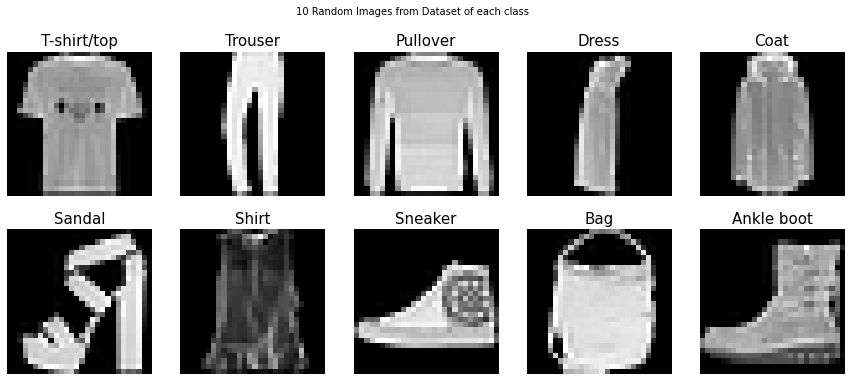

In [3]:
# 3. show image
def get_ten_random_images():
  d = {}
  while len(d.keys()) < 10:
      idx = random.randint(0, len(y_train)-1)
      if y_train[idx] not in d.keys():
          d[y_train[idx]] = idx
  return d

d = get_ten_random_images()
rows = 2
cols = 5
fig, axes = plt.subplots(rows, cols, figsize = (15,6))
axes = axes.ravel()
for i in range(1, rows*cols+1):
    axes[i-1].imshow(X_train[d[i-1]], cmap = 'gray')
    axes[i-1].axis('off')
    axes[i-1].set_title(label[i-1], fontsize=15)
fig.suptitle('10 Random Images from Dataset of each class', fontsize = 10)
plt.show()

In [4]:
# 4. prepare data
img_width = 28
img_height = 28
img_channel = 1
X_train = X_train.reshape(X_train.shape[0], img_width, img_height, img_channel)
X_test = X_test.reshape(X_test.shape[0], img_width, img_height, img_channel)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
 
X_train = X_train/255.0
X_test = X_test/255.0

In [5]:
# 5. build model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, img_channel)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                        

In [7]:
# 6. train model
start_time = time.time()
H = model.fit(X_train, y_train, validation_split=0.2, batch_size=64, epochs=20, verbose=1)
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

Epoch 1/20
750/750 [==============================] - 4s 6ms/step - loss: 0.1264 - accuracy: 0.9524 - val_loss: 0.2300 - val_accuracy: 0.9305
Epoch 2/20
750/750 [==============================] - 7s 9ms/step - loss: 0.1240 - accuracy: 0.9531 - val_loss: 0.2221 - val_accuracy: 0.9293
Epoch 3/20
750/750 [==============================] - 4s 6ms/step - loss: 0.1256 - accuracy: 0.9530 - val_loss: 0.2196 - val_accuracy: 0.9292
Epoch 4/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1229 - accuracy: 0.9549 - val_loss: 0.2239 - val_accuracy: 0.9285
Epoch 5/20
750/750 [==============================] - 4s 5ms/step - loss: 0.1150 - accuracy: 0.9561 - val_loss: 0.2331 - val_accuracy: 0.9273
Epoch 6/20
750/750 [==============================] - 4s 6ms/step - loss: 0.1207 - accuracy: 0.9550 - val_loss: 0.2264 - val_accuracy: 0.9276
Epoch 7/20
750/750 [==============================] - 4s 6ms/step - loss: 0.1150 - accuracy: 0.9570 - val_loss: 0.2287 - val_accuracy: 0.9312
Epoch 

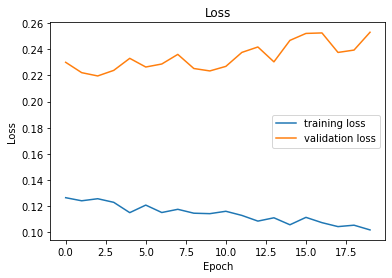

In [8]:
# 7. Vẽ đồ thị loss của traning set và validation set
numOfEpoch = 20
plt.plot(np.arange(0, numOfEpoch), H.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H.history['val_loss'], label='validation loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

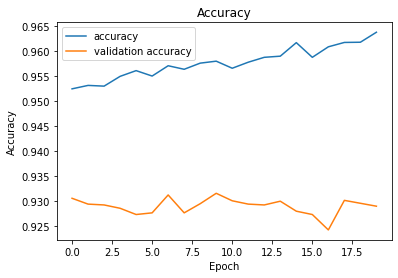

In [9]:
# 8. Vẽ đồ thị accuracy của traning set và validation set
numOfEpoch = 20
plt.plot(np.arange(0, numOfEpoch), H.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

In [10]:
# 9. Đánh giá model với testset
start_time = time.time()
print('[loss, accuracy]: ', model.evaluate(X_test, y_test, verbose = 1))
end_time = time.time()
print("Running time: %.2f (s)" % (end_time - start_time))

313/313 [==============================] - 1s 3ms/step - loss: 0.2726 - accuracy: 0.9270
[loss, accuracy]:  [0.2725635766983032, 0.9269999861717224]
Running time: 1.04 (s)


[[2.2913187e-24 1.8301284e-21 4.3825196e-21 6.2155712e-21 4.1212426e-19
  2.4509936e-12 3.4357102e-20 4.0407322e-10 3.3482034e-22 1.0000000e+00]]
9 9
Giá trị dự đoán:  Ankle boot


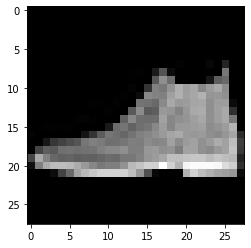

In [28]:
# 10. predict
id = 0
plt.imshow(X_test[id].reshape(img_width, img_height), cmap='gray')

y_predict = model.predict(X_test[id].reshape(1, img_width, img_height, img_channel))
print(y_predict)
y_predict = np.argmax(y_predict)
print(y_test[id], y_predict)
print('Giá trị dự đoán: ', label[y_predict])

In [32]:
# 11. load ảnh
from google.colab import files
uploaded = files.upload()

Saving test.jpg to test.jpg


[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Giá trị dự đoán:  Shirt


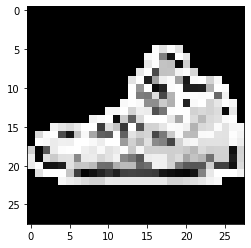

In [35]:
# 12. predict ảnh mạng
import cv2
img = cv2.imread('test.jpg', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(src=img, dsize=(img_width, img_height))
plt.imshow(img, cmap='gray')

y_pred = model.predict(img.reshape(1, img_width, img_height, img_channel))
print(y_pred)
y_pred = np.argmax(y_pred)
print('Giá trị dự đoán: ', label[y_pred])